In [3]:
import torch
import os
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from torchvision.models.detection.faster_rcnn import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torchvision.transforms as T

model = fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)
# Modify the classifier to fit the number of classes
num_classes = 2  # Your number of classes + background
# in_features = model.roi_heads.box_predictor.cls_score.in_features
# model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)


model.load_state_dict(torch.load('model/model_weights1905.pth'))

<All keys matched successfully>

In [5]:
# Splitting the path for clarity and correctness
base_path = 'Unhealthytowers_old'


file_name = 'P10STR_085.16_088.44_002.87_006.15_H4_DOWN_010_Q0074.jpeg'  
file_name = 'P58_0_C_6867.jpeg'  


file_name = 'P80_3_A_2146.jpeg'  
file_name = 'P58_0_H3_9577.jpeg'  
file_name = 'P162_2_C_2581.jpeg'


# Construct the path using os.path.join
file_path = os.path.join(base_path, file_name)

# Load the image
img = Image.open(file_path).convert('RGB')

# Convert the PIL Image to a PyTorch Tensor
# Instead of manually converting and normalizing, let's use torchvision transforms
transform = T.Compose([
    T.ToTensor(),  # Converts to Tensor and scales to [0, 1])  # Assuming your model expects 224x224 images
])

img_tensor = transform(img)

# Add a batch dimension since PyTorch models expect batches
img_tensor = img_tensor.unsqueeze(0)

# Determine the device dynamically
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_tensor = img_tensor.to(device)  # Move tensor to the appropriate device

# Ensure the model is on the same device and set it to evaluation mode
model = model.to(device)
model.eval()

# Perform the prediction
with torch.no_grad():
    prediction = model(img_tensor)

# Process the prediction output as needed
print(prediction)



[{'boxes': tensor([[399.4928, 445.5660, 427.0042, 481.1810],
        [372.8668, 444.0874, 392.5490, 478.5298],
        [265.9827, 440.7627, 297.7270, 490.8520],
        [113.9298, 288.8854, 164.4778, 309.5166],
        [310.2213, 238.9023, 326.1473, 253.9803],
        [155.0556, 286.7696, 165.5595, 312.9441],
        [154.0309, 356.1210, 167.8933, 440.1379],
        [264.7358, 397.7355, 297.5178, 501.7794],
        [154.9174, 393.0962, 167.4980, 437.3970],
        [266.6613, 376.7235, 299.2886, 411.1903]], device='cuda:0'), 'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0'), 'scores': tensor([0.9895, 0.9594, 0.5899, 0.4703, 0.2450, 0.2387, 0.0919, 0.0796, 0.0691,
        0.0531], device='cuda:0')}]


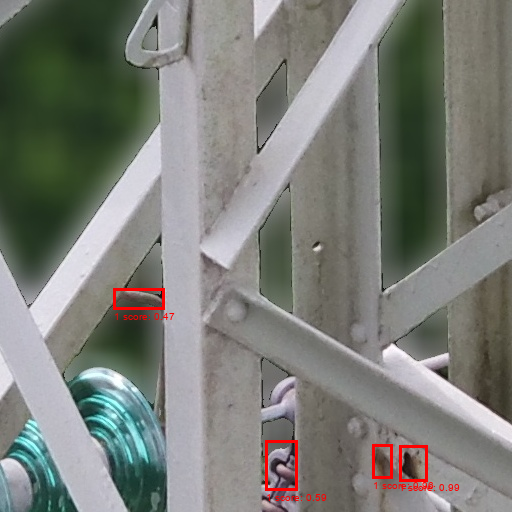

In [6]:
from PIL import Image, ImageDraw, ImageFont
import torchvision.transforms.functional as TF

im = TF.to_pil_image(img_tensor.squeeze().cpu())
draw = ImageDraw.Draw(im)

for index, box in enumerate(prediction[0]['boxes'].cpu().numpy()):
    if prediction[0]['scores'][index] > 0.4:
        draw.rectangle(box, width=3, outline="red")
        text = str(prediction[0]['labels'][index].item())
        text = text + ' score: ' + str(round(prediction[0]['scores'][index].item(),2))
        font = ImageFont.truetype("arial.ttf", size=10)
        text_position = (box[0], box[3])
        draw.text(text_position, text, fill="red", font=font)

im